# PART B: BRISTOL AIR-QUALITY [90 POINTS]
**For the next part of the assignment we will use a subset of the Bristol Air-Quality Dataset.
This dataset deals with monitoring several pollutants in and around the city of Bristol.
These are identified by latitute/longitude positions which are further assigned a unique
SiteID . Readings are taken at hourly intervals from across the sites.
In order to make the analysis manageable we will again provide you with partially curated
versions of the dataset, stored as compressed csv files under the Data/PartB directory.
Again, the files contain a header within the first row. Note that we provide multiple
versions of the data for different questions, and in some cases, we anonymise aspects of
the data: make sure to use the version that is appropriate for the question.**

In [567]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import PCA
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import mean_squared_error
from math import sqrt
%matplotlib inline

In [10]:
# Load BristolAir_Exploratory dataset into a pandas DataFrame
data_path = os.path.join(os.getcwd(), "Data/PartB", "BristolAir_Exploratory.csv")
BA_Exploratory = pd.read_csv(data_path, compression="bz2", header=0)

In [16]:
print("BA_Exploratory shape: {}".format(BA_Exploratory.shape))
BA_Exploratory.describe()

BA_Exploratory shape: (1306758, 7)


,NOx,NO2,NO,SiteID,Loc.Lat,Loc.Long
count,1.191220e+06,1.188426e+06,1.197536e+06,1.306758e+06,1.306758e+06,1.306758e+06
mean,1.200819e+02,4.493445e+01,4.956930e+01,8.411554e+00,5.145213e+01,-2.580516e+00
std,1.428863e+02,3.183197e+01,7.645375e+01,5.329009e+00,1.607845e-02,2.738316e-02
min,-3.108000e+01,-6.669844e+00,-1.771000e+01,0.000000e+00,5.142786e+01,-2.688779e+00
25%,3.550000e+01,2.200000e+01,7.000000e+00,4.000000e+00,5.144175e+01,-2.592724e+00
50%,7.300000e+01,3.800000e+01,2.200000e+01,7.000000e+00,5.145543e+01,-2.582253e+00
75%,1.450000e+02,5.950000e+01,5.700000e+01,1.400000e+01,5.146067e+01,-2.562714e+00
max,2.164250e+03,5.765000e+02,1.231250e+03,1.700000e+01,5.148999e+01,-2.535230e+00


In [24]:
BA_Exploratory.head(50)

,Date Time,NOx,NO2,NO,SiteID,Loc.Lat,Loc.Long
0,2007-03-27 13:00:00+00:00,87.00,28.00,28.75,1,51.441747,-2.559956
1,2007-03-27 14:00:00+00:00,98.50,32.00,32.50,1,51.441747,-2.559956
2,2007-03-27 20:00:00+00:00,202.00,97.75,68.00,6,51.427864,-2.563742
3,2007-03-28 02:00:00+00:00,107.80,39.52,44.52,8,51.489993,-2.688779
4,2007-03-28 04:00:00+00:00,115.78,31.94,54.67,8,51.489993,-2.688779
5,2007-03-28 07:00:00+00:00,410.50,49.50,218.25,1,51.441747,-2.559956
6,2007-03-28 08:00:00+00:00,295.48,53.35,157.87,8,51.489993,-2.688779
7,2007-03-28 12:00:00+00:00,129.75,39.50,45.50,1,51.441747,-2.559956
8,2007-03-28 13:00:00+00:00,162.86,69.53,60.85,8,51.489993,-2.688779
9,2007-03-28 13:00:00+00:00,217.75,86.00,86.25,10,51.460674,-2.582253


In [40]:
print(BA_Exploratory.isnull().sum().sum())
print((BA_Exploratory["NOx"] < 0).sum() + (BA_Exploratory["NO2"] < 0).sum() + (BA_Exploratory["NO"] < 0).sum())

343092
725


**[4.1] (6 points) Summarise the key features/observations in the data: describe the purpose
of each column and report (briefly) also on the dimensionality/ranges (ballpark figures
only, and how they compare across features) and number of sites, and identify anything
out of the ordinary/problematic: i.e. look out for missing data and negative values. Why
are the latter unreasonable in such a dataset? Hint: Refer to the documentation for how
to interpret the pollutant values.**

Each column represents the following: "Data Time" - the date and time of measurement; "NOx", "NO2" and "NO" - concentrations of oxides of nitrogen, nitrogen dioxide and of nitric oxide, respectively; "SiteID" - site id for the statio; "Loc.Lat" and "Loc.Long" - Geo points of latitude and longitude, respectively.

The dataset has 1,306,758 samples, each containing the 7 features described above.
The "NOx", "NO2" and "NO" have a mean value of approximately 120, 44, 49, respectively. There are 18 different sites (marked 0-17).

Over 340,000 values are missing and 725 are negative in the Concentration Columns. The latter is especially problematic, since it probably represents corrupted data - either from wrong measurements or wrong conversions.

**[4.2] (6 points) Repeat the same analysis but this time on a per-site basis. Provide a
table with the number of samples and percentage of problematic samples (negative and
missing) in each site. To report numbers, count a row which has at least one missing
entry as having missing data, and similarly for negative entries. Hint: Pandas has a
handy method, to_latex() , for generating a latex table from a dataframe.**

In [34]:
BA_Exploratory["SiteID"]

0           1
1           1
2           6
3           8
4           8
           ..
1306753     6
1306754    11
1306755    13
1306756    13
1306757     7
Name: SiteID, Length: 1306758, dtype: int64

In [189]:
# Prepare DataFrame
df_problematic = BA_Exploratory.drop(["Date Time", "Loc.Lat", "Loc.Long"], axis=1)

# Query all the samples that contain missing/negative values
df_problematic.query("NOx.isnull() or NO2.isnull() or NO.isnull() or NOx < 0 or NO2 < 0 or NO < 0", inplace=True)

# Count the number of problematic samples for each SiteID (warning: this turns the variable into a Series)
df_problematic = df_problematic.groupby("SiteID").size()

# Turn it back into a DataFrame
df_problematic = df_problematic.reset_index(name="% of probl. samples").set_index("SiteID")

# Add a column containing the number of samples for each SiteID
df_problematic["Number of samples"] = BA_Exploratory.groupby("SiteID").size()

# Calculate percentage (divide number of problematic samples by number of total samples)
df_problematic["% of probl. samples"] = round((df_problematic["% of probl. samples"] / df_problematic["Number of samples"]).mul(100), 2).astype(str) + "%"

# Reverse the column order
df_problematic = df_problematic[["Number of samples", "% of probl. samples"]]

# Put everything together
#df_all_problematic["As percentage"] = percentages

# Print them to LaTeX, into 3 broken-up tables
print(df_problematic.iloc[0:6].T.to_latex())
print()
print(df_problematic.iloc[6:12].T.to_latex())
print()
print(df_problematic.iloc[12:].T.to_latex())

df_problematic.T

\begin{tabular}{lllllll}
\toprule
SiteID &      0 &       1 &      2 &       3 &      4 &       5 \\
\midrule
Number of samples   &   6446 &  163111 &  62990 &   25464 &  74787 &  113952 \\
\% of probl. samples &  1.61\% &   6.29\% &  4.35\% &  78.11\% &  2.07\% &   8.83\% \\
\bottomrule
\end{tabular}


\begin{tabular}{lllllll}
\toprule
SiteID &      6  &      7  &      8  &     9  &     10 &     11 \\
\midrule
Number of samples   &  142141 &  115162 &   43824 &  22071 &  96407 &  20693 \\
\% of probl. samples &   7.45\% &   4.47\% &  21.06\% &   5.3\% &  3.59\% &  1.98\% \\
\bottomrule
\end{tabular}


\begin{tabular}{lllllll}
\toprule
SiteID &      12 &      13 &      14 &      15 &      16 &     17 \\
\midrule
Number of samples   &   45240 &   12423 &  113951 &    2712 &  154331 &  91053 \\
\% of probl. samples &  17.48\% &  51.48\% &  10.53\% &  100.0\% &   6.54\% &  6.27\% \\
\bottomrule
\end{tabular}



SiteID,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
Number of samples,6446,163111,62990,25464,74787,113952,142141,115162,43824,22071,96407,20693,45240,12423,113951,2712,154331,91053
% of probl. samples,1.61%,6.29%,4.35%,78.11%,2.07%,8.83%,7.45%,4.47%,21.06%,5.3%,3.59%,1.98%,17.48%,51.48%,10.53%,100.0%,6.54%,6.27%


**[4.3] (4 points) Briefly summarise how the sites compare in terms of number of samples
and amount of problematic samples.**

Some sites (1, 5, 6, 7, 14 and 15) have over 100,000 samples each. Most sites (1, 2, 3, 4, 8, 9, 10, 11, 12, 13 and 17) have between 10,000 - 100,000 samples each. Two of the sites (0 and 15) have less than 7,000 samples each.

Most sites have between 1% - 11% problematic values. The exceptions are Sites 3 and 13, who have a lot of problematic values: 78.11% and 51.48%, respectively; Sites 8 and 12 have some problematic values: 21.06% and 17.48%, respectively. Site 15 is very problematic: 100% of its samples are problematic.


**[4.4] (3 points) Given that the columns are all oxides of nitrogen and hence we expect
them to be related, we will now look at correlations in our data. This will also be useful in
determining how well we can predict any one of the readings from the other two. Remove
the data from sites 3 and 15 and compute the Pearson correlation coefficient between
each of the three pollutant columns on the remaining data. Visualise the coeefficients
between each pair of columns in a table.**

In [241]:
# Remove samples from Sites 3 and 15. Put the resulting DataFrame in BA_filtered
indexNames = BA_Exploratory[ (BA_Exploratory['SiteID'] == 3) | (BA_Exploratory['SiteID'] == 15) ].index
BA_filtered = BA_Exploratory.drop(indexNames)

# Remove samples with NaN values
BA_filtered.dropna(axis="rows", inplace=True)

# Take only the NOx, NO2 and NO columns
BA_filtered = BA_filtered[["NOx", "NO2", "NO"]]

# Compute Pearson Correlation coefficient
print(BA_filtered.corr(method="pearson").to_latex())
BA_filtered.corr(method="pearson")

\begin{tabular}{lrrr}
\toprule
{} &       NOx &       NO2 &        NO \\
\midrule
NOx &  1.000000 &  0.878017 &  0.988019 \\
NO2 &  0.878017 &  1.000000 &  0.807881 \\
NO  &  0.988019 &  0.807881 &  1.000000 \\
\bottomrule
\end{tabular}



,NOx,NO2,NO
NOx,1.000000,0.878017,0.988019
NO2,0.878017,1.000000,0.807881
NO,0.988019,0.807881,1.000000


**[4.5] (2 points) Comment on the level of correlation between each pair of pollutants.**

"NOx" and "NO" are very highly correlated (0.98 pearson coefficient), meaning we would have a good accuracy predicting one of them based on the other.

"NOx" and "NO2" are well correlated too (0.87 pearson coefficient), and so are "NO2" and "NO" (0.80 pearson coefficient). Overall, all three pollutants would be good at predicting the value of the other two, especially "NOx". 

**Another interesting analysis is to look at the correlations betweens sites. To help you with
this, we have again preprocessed the data and provided you with a new dataset in which
the data is organised in individual columns per-site, thus aligning together readings from
the same time-point. We also only kept columns for which we have a significant number
of overlapping time-points, i.e. for sites 1, 2, 4, 6, 7, 10, 12, 14, 16 and 17. Load the file
BristolAir_SiteAligned.csv . Note that the first two lines are header rows (Pollutant
and SiteID respectively) and hence you need to set header=[0, 1] : also remember to
enforce compression='bz2'. Finally, the first column is the time/date of the reading
( Hint: tell pandas about this by setting parse_dates=[0] ). Explore the data and its
structure and then answer the following questions.**

In [256]:
# Load the BristolAir_SiteAligned into a DataFrame
data_path = os.path.join(os.getcwd(), "Data/PartB", "BristolAir_SiteAligned.csv")
BA_SiteAligned = pd.read_csv(data_path, header=[0,1], compression="bz2", parse_dates=[0])

pd.set_option('display.max_columns', 35)
BA_SiteAligned

Date Time    NOx                                        \
             Unnamed: 0_level_1      1       2       4       6     7      10   
0     2009-03-14 04:00:00+00:00  10.50   15.25   21.50   23.75   8.0   53.25   
1     2009-03-14 05:00:00+00:00   9.75    9.50   11.50   23.25  10.0   30.50   
2     2009-03-15 17:00:00+00:00  67.25   88.75   66.00  163.75  36.0  203.75   
3     2009-03-17 13:00:00+00:00  71.75  124.50  135.00   96.50  38.0  172.50   
4     2009-03-17 15:00:00+00:00  82.00  125.00  104.25  106.50  36.0  193.00   
...                         ...    ...     ...     ...     ...   ...     ...   
14890 2012-03-25 10:00:00+00:00  53.00   67.25  143.50  123.25  29.0   86.75   
14891 2012-03-25 11:00:00+00:00  29.50   42.50   81.00   75.75  36.0   87.25   
14892 2012-03-25 12:00:00+00:00  25.75   44.75   88.25   46.25  27.0  102.00   
14893 2012-03-25 13:00:00+00:00  40.75   46.75   80.50   69.50  17.0   68.00   
14894 2012-03-25 14:00:00+00:00  19.00   37.00   70.25   33.50  15.0   79.75   

                                        NO2                                    \
          12      14      16      17      1      2      4      6     7     10   
0       19.0  201.75   40.00   41.00   4.25  13.00  15.25  10.50   8.0  34.25   
1       19.0  138.00   42.00   37.00   3.50   6.75   6.75   9.75  10.0  21.50   
2      155.0  429.00   94.00  127.25  25.75  62.00  41.00  76.25  32.0  96.75   
3      338.0  734.00  196.50  150.50  29.00  71.25  64.00  42.50  29.0  78.25   
4      321.0  679.00  329.00  151.25  32.00  77.75  51.75  50.75  29.0  95.50   
...      ...     ...     ...     ...    ...    ...    ...    ...   ...    ...   
14890  166.0  219.75  129.25  104.25  34.75  41.50  58.75  43.00  23.0  46.75   
14891  168.0  171.75   91.75   73.50  22.00  31.00  41.75  28.75  25.0  46.00   
14892  164.0  167.00   90.25   94.75  19.00  30.50  43.25  18.00  19.0  50.50   
14893  138.0  167.25  100.75   89.50  27.75  32.25  41.50  24.75  13.0  37.50   
14894  111.0  186.25   65.50   65.75  14.00  27.00  35.25  15.25  13.0  43.50   

                                        NO                                   \
          12      14      16     17      1      2      4      6    7     10   
0       15.0  102.50   21.50  36.50   2.75   2.25   4.00   8.75  0.0  12.50   
1       15.0   79.50   23.25  33.50   3.00   2.75   3.00   8.50  0.0   5.75   
2       76.0  157.00   61.25  83.75  18.25  27.00  16.50  57.25  3.0  69.75   
3      126.0  203.50   87.50  78.75  17.75  53.25  46.25  34.75  6.0  61.50   
4      122.0  210.75  123.00  81.50  21.50  47.50  34.25  36.50  5.0  63.75   
...      ...     ...     ...    ...    ...    ...    ...    ...  ...    ...   
14890   75.0   68.50   63.25  45.75  12.00  25.50  55.25  52.25  4.0  26.25   
14891   77.0   65.50   53.00  39.75   5.00  11.50  25.50  30.75  7.0  27.00   
14892   71.0   56.50   50.00  44.00   4.25  14.25  29.25  18.25  5.0  33.25   
14893   65.0   57.00   52.50  38.50   8.75  14.50  25.25  29.00  2.0  19.75   
14894   55.0   64.75   40.00  32.00   3.25   9.75  23.00  12.00  1.0  23.75   

                                     
          12      14      16     17  
0        3.0   64.75   12.50   2.50  
1        3.0   38.50   12.25   2.25  
2       51.0  177.00   21.50  28.50  
3      139.0  345.50   71.00  47.00  
4      130.0  305.25  134.25  45.50  
...      ...     ...     ...    ...  
14890   60.0   98.75   43.00  38.00  
14891   60.0   69.50   25.50  22.00  
14892   61.0   72.25   26.25  33.25  
14893   47.0   71.25   31.50  33.25  
14894   36.0   79.50   16.50  22.25  

[14895 rows x 31 columns]

**[4.6] (5 points) For each of the three pollutants, compute the Pearson correlation between
sites. Hint: You will need to remove the 'Date Time' column and then group by the first
level of the columns. Then plot these as three heatmaps: show the values within the
figures. Hint: Use the method plot_matrix() from mpctools.extensions.mplext.**

In [277]:
# Drop the Date Time column
BA_SiteAligned_filtered = BA_SiteAligned.drop("Date Time", axis=1)

# Get all correlation matrixes between sites, for each pollutant
NOx_corr_by_sites = BA_SiteAligned_filtered["NOx"].corr(method="pearson").values
NO2_corr_by_sites = BA_SiteAligned_filtered["NO2"].corr(method="pearson").values
NO_corr_by_sites = BA_SiteAligned_filtered["NO"].corr(method="pearson").values

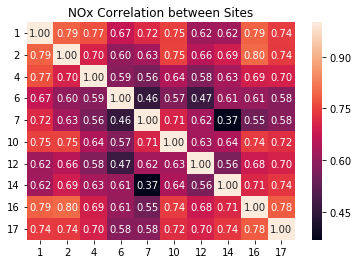

In [295]:
from mpctools.extensions.mplext import plot_matrix

site_labels = [1, 2, 4, 6, 7, 10, 12, 14, 16, 17]

## Each of the plots needs to be uncommented in turns

plt.title("NOx Correlation between Sites")
plot_matrix(matrix=NOx_corr_by_sites, mode='heatmap', labels=site_labels, show_val=True)

#plt.title("NO2 Correlation between Sites")
#plot_matrix(matrix=NO2_corr_by_sites, mode='heatmap', labels=site_labels, show_val=True)

#plt.title("NO Correlation between Sites")
#plot_matrix(matrix=NO_corr_by_sites, mode='heatmap', labels=site_labels, show_val=True)

**[4.7] (4 points) Comment briefly on your observations from Question 4:(6): start by sum-
marising the results from the NO gas and then comment on whether the same is observed
in the other gases or if there is something different.**

We can see that for all 3 gases, most of the Sites are correlated with each other. This is especially true for Sites [1, 2, 10, 16, 17] who always have a correlation coefficient of over 0.69 with each other.

A few sites have a slightly lower correlation coefficient (<0.5) for all 3 gases: pairs (7,14), (7,16), (12,6).

Generally the sites have almost the same correlation coefficient for all 3 gases. However, there are exceptions: for example, Sites 10 and 7 have a coefficient of 0.71 for NOx and NO, but only 0.59 for NO2.

# Question 6 : (41 points) Regression
**Given our understanding of the correlation between signals and sites, we will
now attempt to predict the NOx level for Site 17 given the value at the
other sites. We will evaluate our models using the Root Mean Squared Error
(RMSE) i.e. the square root of the mean_squared_error score by sklearn.**

**To do this we will again make use of the time-aligned data in BristolAir_SiteAligned .
Reload this dataset and extract only the NOx values. Then split this into a feature-set
( X ) and target value for site 17 ( y ).**

In [325]:
# Reload dataset into BA_SiteAligned_NOx
data_path = os.path.join(os.getcwd(), "Data/PartB", "BristolAir_SiteAligned.csv")
BA_SiteAligned_NOx = pd.read_csv(data_path, header=[0,1], compression="bz2", parse_dates=[0])["NOx"]

# Split into X and y
X = BA_SiteAligned_NOx.drop("17", axis=1)
y = BA_SiteAligned_NOx["17"]

**[6.1] (2 points) First things first: since we are dealing with a supervised task, we will
need to split our data into a training and testing set. Furthermore, since some of our
regressors will involve hyper-parameter tuning, we will also need a validation set. Use the
multi_way_split() method from mpctools.extensions.skext to split the data into a
Training (60%), Validation (15%) and Testing (25%) set: use the ShuffleSplit object from
sklearn for the splitter . Set the random state to 0. Hint: The method gives you the
indices of the split for each set, which can then be applied to multiple matrices. Report
the sizes of each dataset.**

In [510]:
from mpctools.extensions.skext import multi_way_split

# Get indexes for training, validation and testing sets.
idx_train, idx_val, idx_test = multi_way_split(y, sizes=[0.6, 0.15, 0.25], splitter=ShuffleSplit, random_state=0)

# Split them into 3 sets each, for X and y
X_train = X.iloc[idx_train]
X_val = X.iloc[idx_val]
X_test = X.iloc[idx_test]

y_train = y.iloc[idx_train]
y_val = y.iloc[idx_val]
y_test = y.iloc[idx_test]


print(len(y_train), len(y_val), len(y_test), y.shape)

8937 2234 3724 (14895,)


The Training set has 8937 samples; The Validation set has 2234 samples; The Testing set has 3724 samples; In total they have 14895 samples.

**[6.2] (4 points) Let us start with a baseline. By using only the y -values, what baseline
regressor can you define (indicate what it does)? Implement it and report the RMSE on
the training and validation sets. Interpret this relative to the statistics of the data.**

In [358]:
y_mean = np.mean(y)

print("RMSE on training: {}".format(sqrt(mean_squared_error(y_train, [y_mean] * len(y_train)))))

print("RMSE on validation: {}".format(sqrt(mean_squared_error(y_val, [y_mean] * len(y_val)))))
print("STD on y: {}".format(sqrt(np.var(y))))

#all_vals_train = np.reshape(X_train.values, (1, X_train.shape[0] * X_train.shape[1]))
#all_vals_val = np.reshape(X_val.values, (1, X_val.shape[0] * X_val.shape[1]))
#print("Training set mean: {} and std: {}".format(np.mean(all_vals_train), sqrt(np.var(all_vals_train))))
#print("Validation set mean: {} and std: {}".format(np.mean(all_vals_val), sqrt(np.var(all_vals_val))))

RMSE on training: 79.71428788140615
RMSE on validation: 80.21061649413826
STD on y: 79.59556187848831


We can define a simple baseline regressor that always predicts the mean of the y-values. This baseline gives us an RMSE of 79.7 on the Training set, and 80.2 on the Validation set. 

As expected, the results obtained are approximately equal to the Standard Deviation of the y-values: 79.6. This is because calculating the RMSE and Standard Deviation implies the same formula.

**[6.3] (3 points) Let us now try a more interesting algorithm: specifically, we will start
with LinearRegression. Train the regressor on the training data and report the RMSE on
the training and validation set, and comment on the relative performance to the baseline.**

In [378]:
X_test.shape

(3724, 9)

In [406]:
lr = LinearRegression(normalize=False)
lr.fit(X_train, y_train)
y_pred_train = lr.predict(X_train)
y_pred_val = lr.predict(X_val)
print("RMSE on Training set: {}".format(sqrt(mean_squared_error(y_train, y_pred_train))))
print("RMSE on Validation set: {}".format(sqrt(mean_squared_error(y_val, y_pred_val))))

RMSE on Training set: 39.83472027954455
RMSE on Validation set: 41.12740349422


**[6.4] (5 points) We want to explore further what the model is learning. Explain why in
Linear Regression, we cannot just blindly use the weights of the regression coefficients
to evaluate the relative importance of each feature, but rather we have to normalise the
features. By referring to the documentation for the LinearRegression implementation in
SKLearn, explain what the normalisation does and how it helps in comparing features.
Will this affect the performance of the Linear Regressor?**

Normalisation is important when our features have different ranges or values. When doing multivariate linear regression, features with a large value will intrinsically influence the result more, but this doesn't necessarily mean that they're more important as predictors.

To normalise the data, SKLearn subtracts the mean and divides by the l2-norm. In our case, normalisation shouldn't affect the performance of our Linear Regressor too much, since the proportional relationships between features should stay the same.

**[6.5] (5 points) Retrain the regressor, setting normalize=True and report (in a table) the
ratio of the relative importance of each feature. Which is the most/least important site?
How do they compare with the correlation coefficients for Site 17 as computed in Question
4:(6), and why do you think that is?**

In [433]:
# Retrain the Regressor with normalize=True
lr2 = LinearRegression(normalize=True)
lr2.fit(X_train, y_train)

ratios_df = pd.DataFrame(index=X_train.columns)
ratios_df.index.name = "SiteID"
ratios_df["Ratio of Relative Importance"] = (lr2.coef_ / lr2.coef_.sum())
ratios_df["Ratio of Relative Importance"] = round(ratios_df["Ratio of Relative Importance"], 4) * 100
print(ratios_df[:5].T.to_latex())
print(ratios_df[5:].T.to_latex())

\begin{tabular}{lrrrrr}
\toprule
SiteID &      1 &     2 &      4 &     6 &     7 \\
\midrule
Ratio of Relative Importance &  14.86 &  1.28 &  17.25 & -0.87 &  7.64 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrrr}
\toprule
SiteID &     10 &     12 &     14 &     16 \\
\midrule
Ratio of Relative Importance &  10.26 &  16.61 &  12.16 &  20.82 \\
\bottomrule
\end{tabular}



Site 16 is the most important, with a ratio of 20.82, and Site 6 is the least important, with a ratio of -0.87.
These results correspond to the NOx Correlation Coefficients from Question 4.6. An explanation for this phenomenon is that since Site 16 has the highest correlation, it provides the most information for making a prediction, and thus is also the most important Site; and inversely for Site 6.

**[6.6] (5 points) It might be that with non-linear models, we may get better performance.
Let us try to use K-Nearest-Neighbours. Train a KNN regressor with default parameters
on the training set and report performance on the training and validation set. Hint: it
might be beneficial to set n_jobs=-1 to improve performance. How does it compare with
Linear Regression in terms of performance on both sets? What is a limitation of the KNN
algorithm for our dataset?**

It seems that our KNN Regressor provides better performance on both Testing (RMSE of 32.4) and Validation (RMSE of 40.30) sets as compared to the Linear Regressor tried above (with RMSEs of 39.8 and 41.1, respectively).

The KNN algorithm has a few limitations, such as: being a slow algorithm that has to go through the entire Training set for each prediction; Needing features to have the same scale; or not knowing how to choose the optimal number of neighbors.

In [441]:
knnr = KNeighborsRegressor(n_jobs=-1)
knnr.fit(X_train, y_train)
y_train_pred = knnr.predict(X_train)
y_val_pred = knnr.predict(X_val)

print("RMSE on Training set: {}".format(sqrt(mean_squared_error(y_train, y_train_pred))))
print("RMSE on Validation set: {}".format(sqrt(mean_squared_error(y_val, y_val_pred))))

RMSE on Training set: 32.43647936515854
RMSE on Validation set: 40.3071558368958


**[6.7] (4 points) The KNN regression allows setting a number of hyper-parameters. We
will optimise only one: the number of neighbours to use. By using the validation set, find
the optimal value for the n_neighbours parameter out of the values [2, 4, 8, 16, 32]. Plot
the training/validation RMSE and indicate (for example with a line) the best value for
n_neighbours .**

In [495]:
ns = [2, 4, 8, 16, 32]
RMSE_train = []
RMSE_val = []

for n in ns:
    knnr = KNeighborsRegressor(n_neighbors=n, n_jobs=-1)
    knnr.fit(X_train, y_train)
    y_train_pred = knnr.predict(X_train)
    y_val_pred = knnr.predict(X_val)
    RMSE_train.append(sqrt(mean_squared_error(y_train, y_train_pred)))
    RMSE_val.append(sqrt(mean_squared_error(y_val, y_val_pred)))
#print(RMSE_train, RMSE_val)

[42.95551269008171, 40.595609577419665, 39.37125304834977, 38.901851355962386, 39.13083888473987]


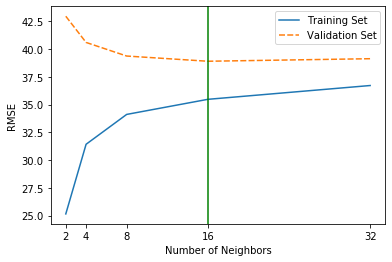

In [496]:
# Create DataFrame for plotting
df_RMSE = pd.DataFrame(index=ns, columns=["Training Set"], data=RMSE_train)
df_RMSE["Validation Set"]=RMSE_val

ax = sns.lineplot(data=df_RMSE)
ax.set_xticks(ns)
ax.set_xlabel("Number of Neighbors")
ax.set_ylabel("RMSE")

plt.axvline(x=16, color="green")
plt.plot()

print(RMSE_val)

The best-case RMSE performance on the Validation set is 38.90, when the number of neighbors is 16.

**[6.9] (4 points) Let us try one last regression algorithm: we will now use DecisionTreeRe-
gressor. Again, the algorithm contains a number of hyper-parameters, and we will opti-
mise the depth of the tree. Train a series of Decision Tree Regressors, optimising (over the
validation set) the max_depth over the values [2, 4, 8, 16, 32, 64]. Set random_state=0 .
Plot the training/validation RMSE and indicate (as before) the best value for max_depth.**

In [497]:
depths = [2, 4, 8, 16, 32, 64]
RMSE_train = []
RMSE_val = []

for d in depths:
    dtr = DecisionTreeRegressor(max_depth=d, random_state=0)
    dtr.fit(X_train, y_train)
    y_train_pred = dtr.predict(X_train)
    y_val_pred = dtr.predict(X_val)
    RMSE_train.append(sqrt(mean_squared_error(y_train, y_train_pred)))
    RMSE_val.append(sqrt(mean_squared_error(y_val, y_val_pred)))
print(RMSE_train, RMSE_val)

[52.6134623455056, 43.38835611468483, 33.27961915442297, 13.672221342095378, 0.09114909269816067, 0.0] [53.25095179219833, 46.12769116861275, 45.84380928287788, 53.4486396323909, 55.62441997967441, 55.9470657647145]


[53.25095179219833, 46.12769116861275, 45.84380928287788, 53.4486396323909, 55.62441997967441, 55.9470657647145]


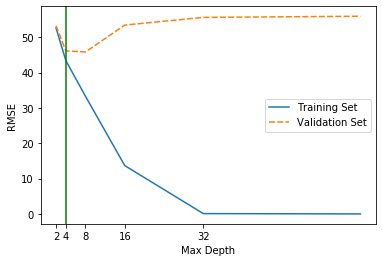

In [498]:
# Create DataFrame for plotting
df_RMSE = pd.DataFrame(index=depths, columns=["Training Set"], data=RMSE_train)
df_RMSE["Validation Set"]=RMSE_val

ax = sns.lineplot(data=df_RMSE)
ax.set_xticks(ns)
ax.set_xlabel("Max Depth")
ax.set_ylabel("RMSE")

plt.axvline(x=4, color="green")
plt.plot()

print(RMSE_val)

The best-case RMSE performance on the Validation set is 46.13, corresponding to a max\_depth of 4. We can see that the Decision Tree overfits after a max\_depth of 4, because it generalizes poorly on unseen data (the Validation Set) while it fits too much to the Training data.

**[6.11] (5 points) To conclude let us now compare all the models on the testing set. Com-
bine the training and validation sets and retrain the model from each family on it: in
cases where we optimised hyper-parameters, set this to the best-case value. Report the
testing-set performance of each model in a table Hint: You should have 4 values.**

In [530]:
df_best_models = pd.DataFrame(index=["Baseline model", "Linear Regressor", "KNN Regressor", "DT Regressor"], columns=["RMSE"])
df_best_models.index.name = "Model"

X_train_all = pd.concat([X_train, X_val])
y_train_all = pd.concat([y_train, y_val])

# Baseline model
y_mean = np.mean(y_train_all)
df_best_models["RMSE"]["Baseline model"] = sqrt(mean_squared_error(y_test, [y_mean] * len(y_test)))

# Linear Regressor performance
lr2 = LinearRegression(normalize=True)
lr2.fit(X_train_all, y_train_all)
y_pred = lr2.predict(X_test)
df_best_models["RMSE"]["Linear Regressor"] = sqrt(mean_squared_error(y_test, y_pred))

# KNN Regressor performance
knnr = KNeighborsRegressor(n_neighbors=16, n_jobs=-1)
knnr.fit(X_train_all, y_train_all)
y_pred = knnr.predict(X_test)
df_best_models["RMSE"]["KNN Regressor"] = sqrt(mean_squared_error(y_test, y_pred))

# Linear Regressor performance
dtr = DecisionTreeRegressor(max_depth=4, random_state=0)
dtr.fit(X_train_all, y_train_all)
y_pred = dtr.predict(X_test)
df_best_models["RMSE"]["DT Regressor"] = sqrt(mean_squared_error(y_test, y_pred))

print(df_best_models.T.to_latex())
df_best_models

\begin{tabular}{lllll}
\toprule
Model & Baseline model & Linear Regressor & KNN Regressor & DT Regressor \\
\midrule
RMSE &        78.9521 &           40.509 &        37.985 &      46.5188 \\
\bottomrule
\end{tabular}



,RMSE
Model,
Baseline model,78.9521
Linear Regressor,40.509
KNN Regressor,37.985
DT Regressor,46.5188


# Question 5 : (19 Points) Principal Component Analysis
**One aspect which we have not yet explored is the temporal nature of the data.
That is, we need to keep in mind that the readings have a temporal aspect to
them which can provide some interesting insight. We will explore this next.**
We have provided you with a new version of the dataset, BristolAir_DayAligned.csv ,
in which the data is organised by daily readings. That is the first two-columns indicate
the SiteID (for which we have selected a reduced subset to make the problem more man-
ageable), and the Date of the readings. The remaining 72 ( 24 × 3 ) columns (numbered
0 through 71) are the 24-hour readings for each of the 'NOx', 'NO2' and 'NO' pollutants
respectively. Load the data into a pandas dataframe. Remember that the first line is
the header, and that the index columns should be 'SiteID' and 'Date': also, this is again
compressed using 'bz2'. Look at the first few lines and familiarise yourself with the data.

In [547]:
# Load BristolAir_DayAligned dataset into a pandas DataFrame
data_path = os.path.join(os.getcwd(), "Data/PartB", "BristolAir_DayAligned.csv")
BA_DayAligned = pd.read_csv(data_path, compression="bz2", header=0)

BA_DayAligned.describe()

,SiteID,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,...,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71
count,27217.000000,27217.000000,27217.000000,27217.000000,27217.000000,27217.000000,27217.000000,27217.000000,27217.000000,27217.000000,27217.000000,27217.000000,27217.000000,27217.000000,27217.000000,27217.000000,27217.000000,...,27217.000000,27217.000000,27217.000000,27217.000000,27217.000000,27217.000000,27217.000000,27217.000000,27217.000000,27217.000000,27217.000000,27217.000000,27217.000000,27217.000000,27217.000000,27217.000000,27217.000000
mean,8.321931,78.138448,62.901726,55.417450,51.708930,52.041121,67.964598,111.175548,170.640948,203.585007,197.370271,178.253174,161.240301,152.208129,148.150373,148.681851,154.225679,...,77.503292,94.543723,90.605775,79.591633,69.804690,64.505631,61.950915,61.768948,64.198569,69.825656,74.656386,69.586750,59.027856,50.696872,45.843732,43.206129,38.150435
std,5.391231,99.921068,80.751159,72.309788,67.889267,61.132200,68.443922,107.781707,178.970712,231.199888,236.091492,211.607538,180.605360,166.972940,163.537292,165.094040,173.134925,...,99.239504,127.771729,129.290686,114.265901,95.644993,87.293704,84.864764,85.702773,90.447783,100.575086,112.379930,107.506512,88.798489,74.639059,68.551762,66.652583,63.362157
min,1.000000,-0.919300,-0.380000,-0.388200,-0.388200,-0.290000,0.000000,0.000000,1.250000,1.250000,2.750000,2.295000,1.960300,2.314600,1.338800,1.331100,0.573700,...,-0.705000,-0.185500,0.000000,0.000000,0.000000,-0.155900,-0.155900,-0.093500,-0.259700,-0.482400,-0.187100,-0.519500,-0.816400,-0.890600,-0.779600,-1.039000,-1.076100
25%,5.000000,19.500000,17.000000,14.750000,14.250000,16.500000,23.000000,35.500000,48.750000,53.000000,51.250000,50.500000,50.000000,49.000000,48.000000,47.750000,48.250000,...,11.000000,13.500000,13.500000,13.500000,13.250000,13.000000,12.500000,11.750000,11.250000,11.500000,10.500000,9.000000,7.470700,6.000000,5.250000,4.500000,3.500000
50%,7.000000,40.000000,33.000000,29.064260,28.746790,32.500000,47.000000,74.250000,104.344450,113.000000,106.500000,99.000000,95.000000,90.750000,88.000000,88.000000,90.000000,...,37.250000,41.000000,38.000000,34.750000,32.500000,30.250000,29.000000,28.750000,28.750000,29.500000,29.000000,26.500000,23.250000,19.750000,17.250000,14.149370,10.750000
75%,14.000000,90.750000,73.000000,64.000000,58.750000,62.500000,90.000000,153.250000,229.250000,255.000000,233.000000,206.750000,189.500000,179.250000,171.500000,170.750000,178.000000,...,104.750000,116.000000,103.000000,88.500000,79.000000,73.000000,68.750000,67.250000,70.000000,73.750000,76.750000,75.000000,69.500000,63.000000,56.500000,51.750000,42.500000
max,16.000000,1324.000000,1121.000000,1312.000000,1024.000000,830.500000,1143.750000,1120.500000,1570.250000,1874.000000,2155.750000,2036.000000,1805.000000,1805.000000,1805.000000,1380.750000,1658.000000,...,900.750000,1134.000000,1231.250000,1149.000000,995.750000,988.000000,988.000000,776.250000,980.000000,1161.000000,1014.000000,992.750000,875.000000,1088.000000,974.000000,889.000000,721.000000


**[5.1] (1 point) Plot the first 5 lines of data (plot each row as a single line-plot).**

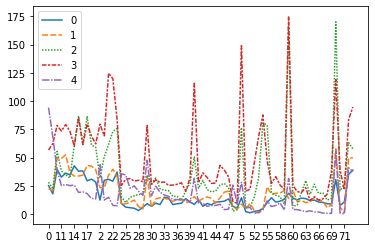

In [562]:
first_five = BA_DayAligned.iloc[:5].drop(["SiteID", "Date"], axis=1)

ax = sns.lineplot(data=[first_five.iloc[0], first_five.iloc[1], first_five.iloc[2], first_five.iloc[3], first_five.iloc[4]])
ax.set_xticks(np.arange(0, 71, 3))

**[5.2] (5 points) We will focus first on data solely from Site 1. Extract the data from
this site, and run PCA with the number of components set to 72 for now. Set the
random_state=0 . On a single graph plot: (i) the percentage of the variance explained
by each principal component (as a bar-chart), (ii) the cumulative variance (line-plot)
explained by the first n components: ( Hint: you should use twinx() to make the plot fit ),
and , (iii) mark the point at which the number of components collectively explain at least
95% of the variance (using a vertical line). Hint: Number components starting from 1.**

/home/valentine/miniconda3/envs/iamlassignment2/lib/python3.6/site-packages/pandas/core/frame.py:4097: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


array([9.27134032e+04, 2.17560776e+04, 1.05257021e+04, 8.21121960e+03,
       6.15352865e+03, 3.22748387e+03, 2.25234194e+03, 1.92399783e+03,
       1.55016032e+03, 1.18536307e+03, 1.05398620e+03, 8.87195064e+02,
       6.86446288e+02, 6.47035428e+02, 5.33793523e+02, 4.38267713e+02,
       3.90913885e+02, 3.56384189e+02, 3.52310127e+02, 3.11620058e+02,
       2.93273850e+02, 2.81885499e+02, 2.49371950e+02, 2.00922405e+02,
       1.89196224e+02, 1.71646122e+02, 1.56358849e+02, 1.28161791e+02,
       9.33829663e+01, 9.13524354e+01, 7.70283597e+01, 4.50196910e+01,
       4.15008661e+01, 2.91007145e+01, 2.48298791e+01, 2.07506028e+01,
       1.65162863e+01, 1.56847674e+01, 1.25334526e+01, 1.21703404e+01,
       1.09193035e+01, 9.69466508e+00, 9.09258162e+00, 8.79225282e+00,
       8.50809340e+00, 7.47392819e+00, 7.27649012e+00, 6.83761309e+00,
       6.30109053e+00, 5.84456313e+00, 5.08370781e+00, 3.43300370e+00,
       2.03589900e+00, 1.73070032e+00, 8.29021234e-01, 7.51788143e-01,
      

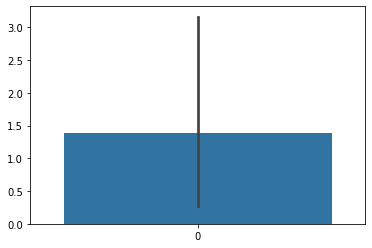

In [597]:
BA_DayAligned_1 = BA_DayAligned.query("SiteID==1")
BA_DayAligned_1.drop(["SiteID", "Date"], axis=1, inplace=True)
pca = PCA(n_components=72, random_state=0)
pca.fit(BA_DayAligned_1)

pca_percentage = pca.explained_variance_ratio_ * 100
cumulative_var = np.cumsum(pca.explained_variance_)
percentage_cum = cumulative_var / pca.explained_variance_.sum()
ax = sns.barplot(data=pca_percentage)

df_pca_percentage = pd.DataFrame(index=np.arange(0,72), data=pca_percentage)

pca.explained_variance_
